In [27]:
from flask import Flask, render_template, request,jsonify
from flask_cors import CORS,cross_origin
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq

# Step 1

First We have To reach the website we want to scrape.

In [ ]:
search_string = "iphone11"

: 

Every Website uses Get method to search for anything. This results in a Search Query in the url. We will use it to search directly using Python.

In [29]:
flipcart_url = "https://www.flipkart.com/search?q=" + search_string

In [30]:
flipcart_url

'https://www.flipkart.com/search?q=iphone11'

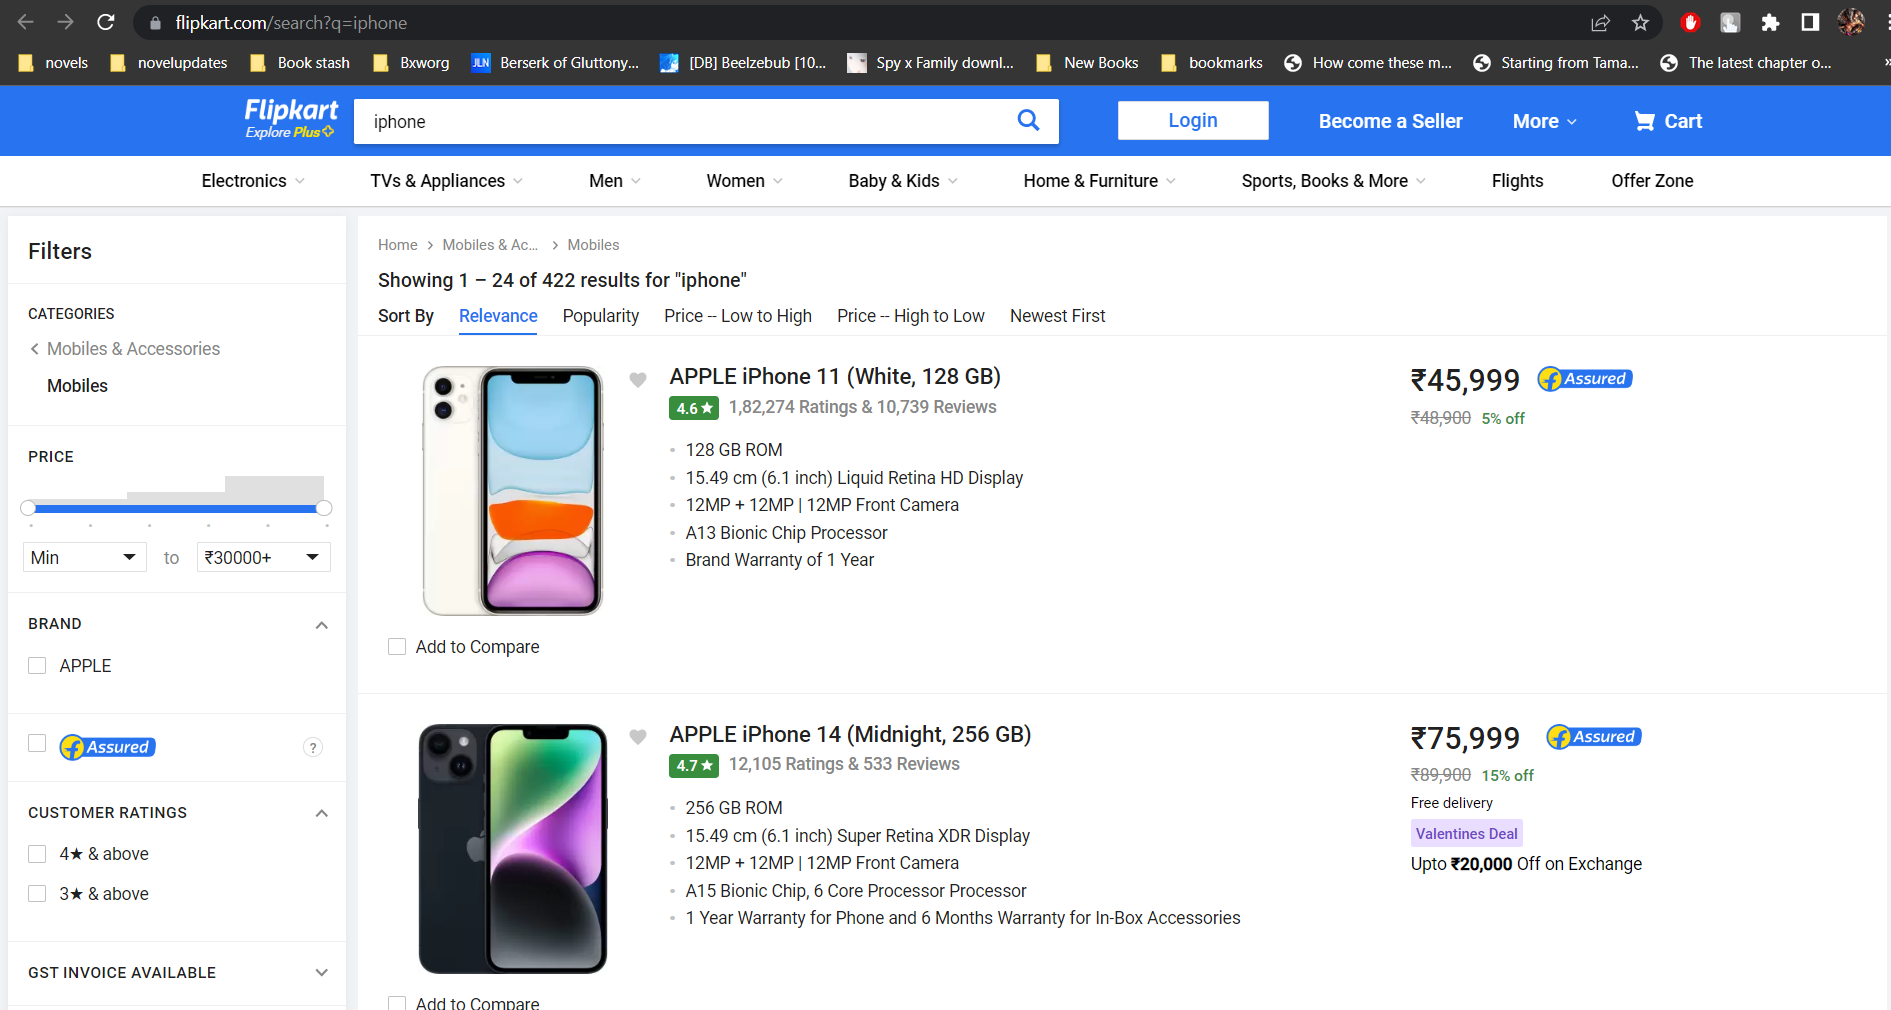

# Step 2

Now, We can basically directly search from python. 

So, let's move onto the next step, clicking on a link of a product from python.

We will now use uReq to hit the URL.

In [31]:
uclient = uReq(flipcart_url)

In [32]:
uclient

read() Function will now give us the entire data from that link. 

We will read the whole junk that we scraped, and then store it in a variable.

In [33]:
flipcartpage = uclient.read()

We have to close the uclient now. 

Now, we will parse the entire junk data using Beautiful soup.

In [34]:
flipkart_html = bs(flipcartpage, "html.parser")

Now, go to the link and then press f12. 

Now start to inspect elements and You will be able to get the entire info in html format there. Be it the link of the images, the prices, then link to the next page, etc etc.

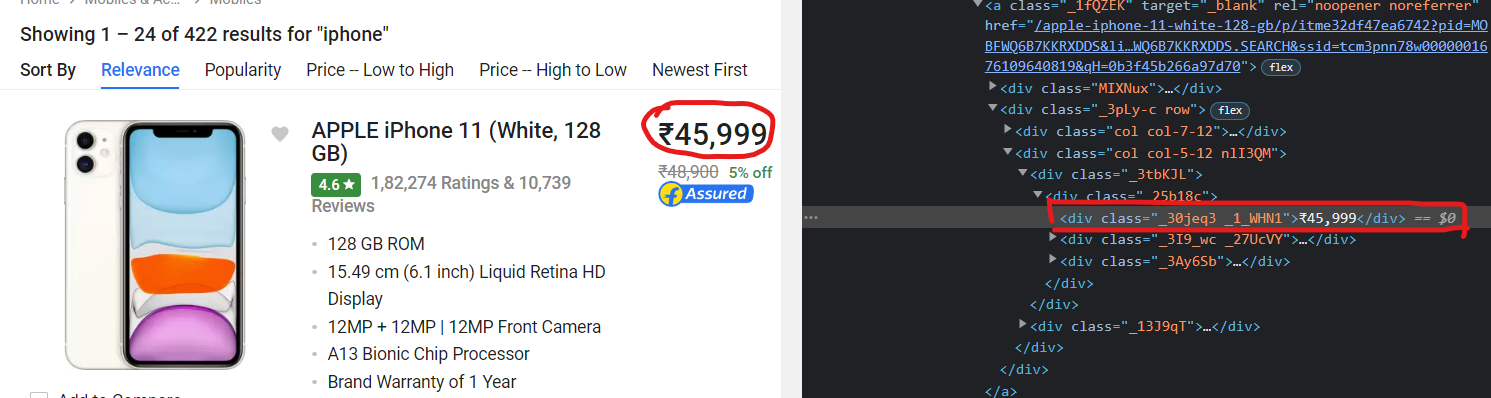

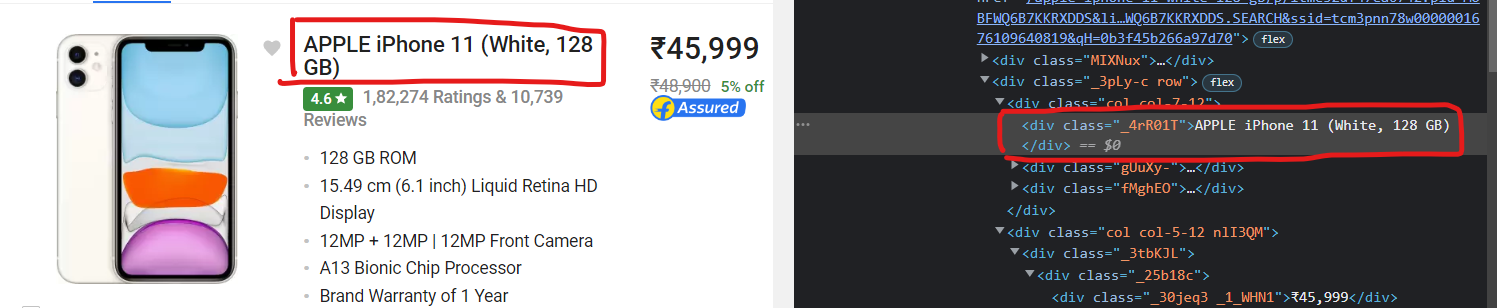

Now, We have to search for the tags that hold the entire information of the products. Class Tags are usually the ones doing this.

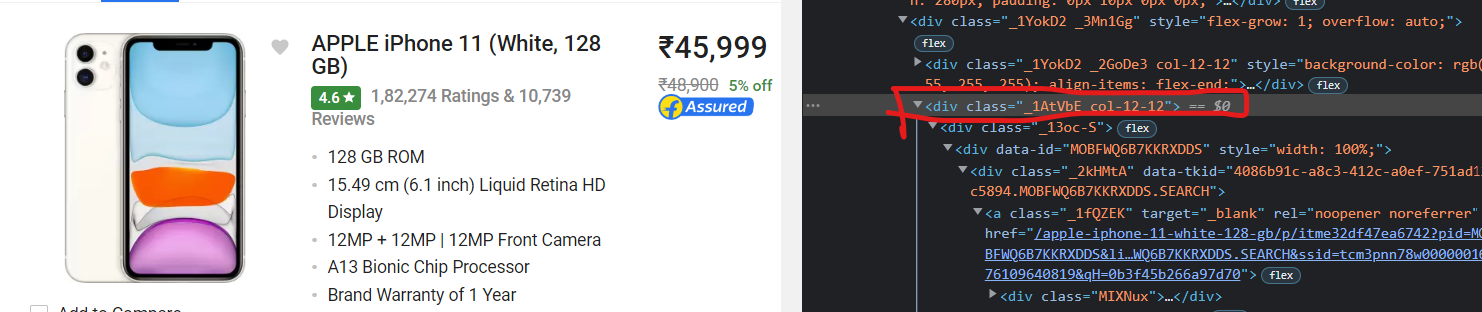

# Step 3: 

Seach For the Class Tag That contains Your Product Info.

In [35]:
# Now, let's Get this in the python.
#find_all function takes the first parameter for what to search and then key, value pair for the things to search.

bigboxes = flipkart_html.find_all("div", {"class", "_1AtVbE col-12-12"})

Now We got all the HTML Data of all the Products in that same div class. 

Now, we have to see how many records there are in this bigboxes. 

Or How many Products are there In the div class that we Found.


In [36]:
len(bigboxes)

30

So basically there are 30 products in the div class.

Now, we have to search for the flipkart url for our product from inside this bigboxes. The link will be in href.

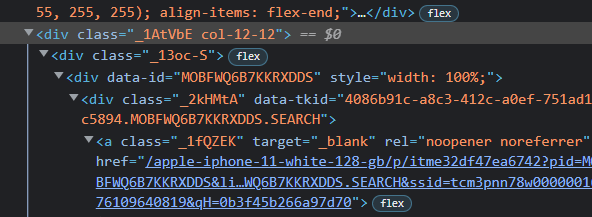

So now we will search one by one for the the correct list in the bigboxes where it might contain our main information of our first Product.

In [37]:
# Let's take a variable "box" which has the data for a single product. 
box = bigboxes[2]

In [38]:
box

<div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="MOBFWQ6B7KKRXDDS" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" href="/apple-iphone-11-white-128-gb/p/itme32df47ea6742?pid=MOBFWQ6B7KKRXDDS&amp;lid=LSTMOBFWQ6B7KKRXDDSULUZ0N&amp;marketplace=FLIPKART&amp;q=iphone11&amp;store=tyy%2F4io&amp;srno=s_1_1&amp;otracker=search&amp;fm=organic&amp;iid=e25c9099-22e8-46ba-9acb-368adb8cb711.MOBFWQ6B7KKRXDDS.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=hqwrvykts00000001676622233700&amp;qH=d6db477051465f9a" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="APPLE iPhone 11 (White, 128 GB)" class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/k2jbyq80pkrrdj/mobile-refurbished/k/y/d/iphone-11-256-u-mwm82hn-a-apple-0-original-imafkg25mhaztxns.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDk

Now, We have to extract the href. 

We can see that the href tag is inside much further in the original div tag in the beginning. 

We will bypass the div tags one by one till we reach our required div tag.

In [39]:
box.div.div.div

<div class="_2kHMtA"><a class="_1fQZEK" href="/apple-iphone-11-white-128-gb/p/itme32df47ea6742?pid=MOBFWQ6B7KKRXDDS&amp;lid=LSTMOBFWQ6B7KKRXDDSULUZ0N&amp;marketplace=FLIPKART&amp;q=iphone11&amp;store=tyy%2F4io&amp;srno=s_1_1&amp;otracker=search&amp;fm=organic&amp;iid=e25c9099-22e8-46ba-9acb-368adb8cb711.MOBFWQ6B7KKRXDDS.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=hqwrvykts00000001676622233700&amp;qH=d6db477051465f9a" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="APPLE iPhone 11 (White, 128 GB)" class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/k2jbyq80pkrrdj/mobile-refurbished/k/y/d/iphone-11-256-u-mwm82hn-a-apple-0-original-imafkg25mhaztxns.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input class="_30VH1S" readonly="" type="checkbox"/><div class="_24_Dny"></div></label></span><labe

We can use div.div.div in the box to skip the div blocks that are useless for us. We know that our main div is 4th so we skipped 3 times. And Got the Main one.

In [40]:
box.div.div.div.a['href']

'/apple-iphone-11-white-128-gb/p/itme32df47ea6742?pid=MOBFWQ6B7KKRXDDS&lid=LSTMOBFWQ6B7KKRXDDSULUZ0N&marketplace=FLIPKART&q=iphone11&store=tyy%2F4io&srno=s_1_1&otracker=search&fm=organic&iid=e25c9099-22e8-46ba-9acb-368adb8cb711.MOBFWQ6B7KKRXDDS.SEARCH&ppt=None&ppn=None&ssid=hqwrvykts00000001676622233700&qH=d6db477051465f9a'

This is the link to the first product page We got after getting the href. 

https://www.flipkart.com/apple-iphone-11-white-128-gb/p/itme32df47ea6742?pid=MOBFWQ6B7KKRXDDS&lid=LSTMOBFWQ6B7KKRXDDSULUZ0N&marketplace=FLIPKART&q=iphone11&store=tyy%2F4io&srno=s_1_1&otracker=search&fm=organic&iid=f507a727-f38a-41c3-af78-10812502d389.MOBFWQ6B7KKRXDDS.SEARCH&ppt=None&ppn=None&ssid=jelb3b8nhc0000001676620961850&qH=d6db477051465f9a

In [41]:
product_link  = "https://www.flipkart.com"+box.div.div.div.a['href']

In [42]:
product_link

'https://www.flipkart.com/apple-iphone-11-white-128-gb/p/itme32df47ea6742?pid=MOBFWQ6B7KKRXDDS&lid=LSTMOBFWQ6B7KKRXDDSULUZ0N&marketplace=FLIPKART&q=iphone11&store=tyy%2F4io&srno=s_1_1&otracker=search&fm=organic&iid=e25c9099-22e8-46ba-9acb-368adb8cb711.MOBFWQ6B7KKRXDDS.SEARCH&ppt=None&ppn=None&ssid=hqwrvykts00000001676622233700&qH=d6db477051465f9a'

In [43]:
# Now we will have to get the data from the Product page. For that we need get the data in text format from the link which we will parse using Beautiful Soup.

productreq =requests.get(product_link)

In [44]:
productreq

<Response [200]>

In [45]:
prod_html = bs(productreq.text, "html.parser")

Now prod_html contains all the data in html format of the Product page. 

# Step 4:

Go to the Review Section and Start and Start to take our reviews.

We Will follow the same procedure as above. We will search for the div class that contains the Reviews first.

The div class containing all the Reviews is: _16PBlm

In [46]:
comment_box = prod_html.find_all('div', {"class":"_16PBlm"})

Now let's try get into a single comment Box. 

In [47]:
comment_box[0]

<div class="_16PBlm"><div class="col"><div class="col _2wzgFH"><div class="row"><div class="_3LWZlK _1BLPMq">5</div><p class="_2-N8zT">Simply awesome</p></div><div class="row"><div class="t-ZTKy"><div><div class="">Really satisfied with the Product I received... It’s totally genuine and the packaging was also really good so if ur planning to buy just go for it.</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div></div><div class="_2nMSwX _3oLIki"><div class="_21YjFX _2A07HP" style="background-image:url(https://rukminim1.flixcart.com/blobio/124/124/imr-202011/blobio-imr-202011_e4b34b9e355e4836ade8b1f6345ee73b.jpeg?q=90), url();width:62px;height:62px"></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">Flipkart Customer</p><svg class="_2a1p_T" height="14" viewbox="0 0 12 12" width="14" xmlns="http://www.w3.org/2000/svg"><g><circle cx="6" cy="6" fill="#878787" r="6"></circle><path d="M3 6l2 2 4-4" fill="#878787" stroke="#FFF" stroke-width="1.5"

Let's try scraping the Ratings first. We can see from the inspect Element that the ratings are inside 4th div tag from the beginning. So, we have to enter inside 4 div tags and get the text only.

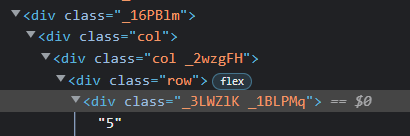

In [50]:
comment_box[0].div.div.div.div.text

'5'

In [54]:
# Now, let's run a for loop and get all the ratings.

for i in comment_box:
    print(i.div.div.div.div.text)

5
5
5
4
5
5
5
5
4
5


AttributeError: 'NoneType' object has no attribute 'div'

### Now, Let's Get Customer Comments.

We can see in the below Screen Shot That there is a comment Inside this comment box. And We have to scrape it out.

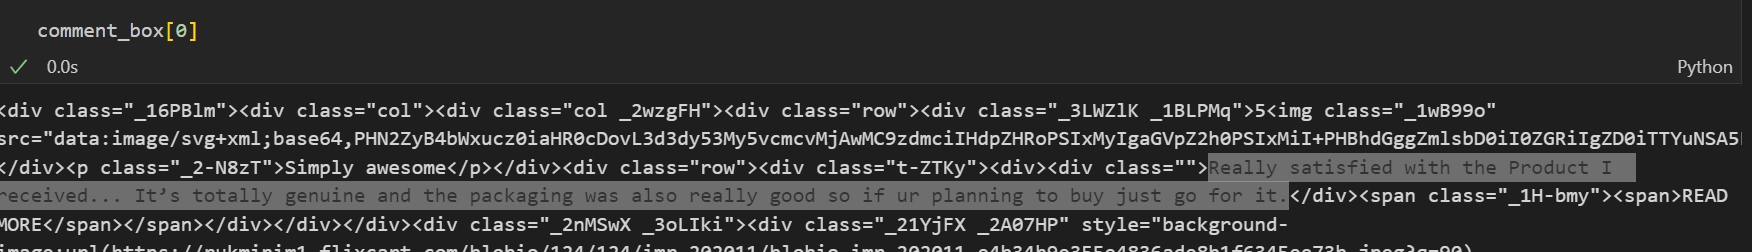

But to reach those Comments, we have to reach that div tag first.

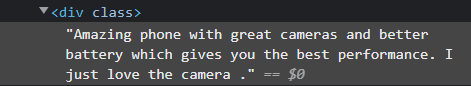

As we can see, the comment is in a blank div class. This means we can use this easily to get the comments.

In [60]:
# find_all returns a list and we can use indexing to get to the index where our comment is. Then, we will skip the div tags and extract the comment using '.text'.
comment_box[0].findAll("div", {"class": ""})[0].div.text

'Really satisfied with the Product I received... It’s totally genuine and the packaging was also really good so if ur planning to buy just go for it.'

Now, let's see all the comments.

In [69]:
try:
    for i in comment_box:
        print(i.find_all("div", {"class": ""})[0].div.text)
        print("\n")
except:
    pass

Really satisfied with the Product I received... It’s totally genuine and the packaging was also really good so if ur planning to buy just go for it.


Amazing phone with great cameras and better battery which gives you the best performance. I just love the camera .


Great iPhone very snappy experience as apple kind. Upgraded from iPhone 7. Pros-Camera top class - Battery top performed -Chipset no need to say as apple kind -Security as you expect from apple - Display super bright industry leading colour   accuracy and super responsive -Build quality as expect from apple sturdy  premium durable beautiful stylish. -Os most stable os in smartphone industry Cons -No 5G-Display is not based on OLED technology -Charger headphones and 1 apple stic...


I'm Really happy with the productDelivery was fast as well..it was a gift for my sister and she loved it so much.


It's my first time to use iOS phone and I am loving my upgradation 😍😍 I love the color, I love the assebility of the phone....I 

#### Now, let's get the names of the commentors as well.

First find the tag where the names are.

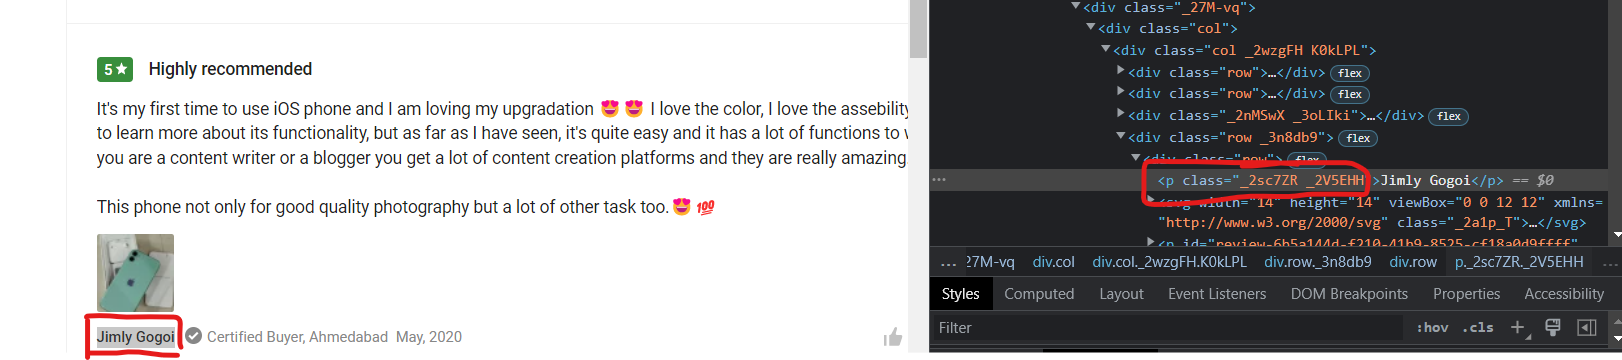

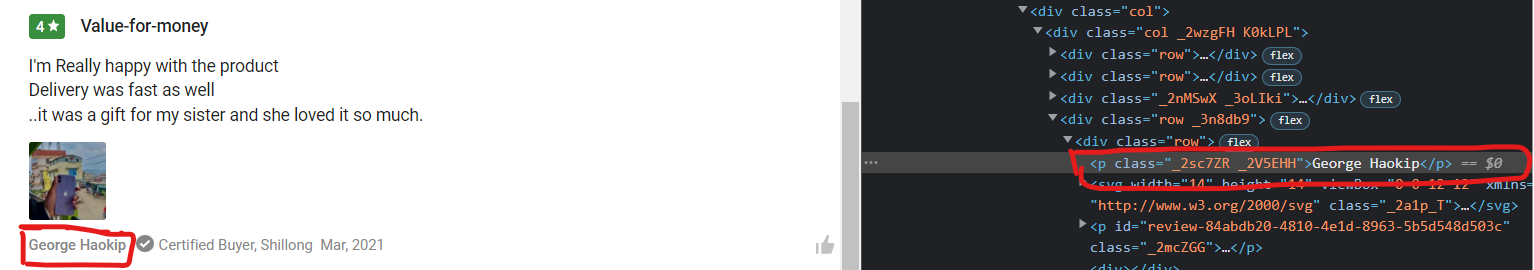

As we can see, both the names are in the same p class tag. So we just have to reach there.

In [70]:
comment_box[0].find_all("p", {"class": "_2sc7ZR _2V5EHH"})

[<p class="_2sc7ZR _2V5EHH">Flipkart Customer</p>]

Now, Let's get all the names.

In [72]:
for i in comment_box:
    print(i.find_all("p", {"class": "_2sc7ZR _2V5EHH"})[0].text)

Flipkart Customer
Flipkart Customer
Manish Raghuvanshi
George Haokip
Jimly  Gogoi
Vamshi  Chakrala 
Chirag Rajput
Vishal Dubey
vijay hegde
Rahul Verma


IndexError: list index out of range

Now, Let's get the names of the commentors as well as their comments.

In [75]:
try: 
    for i in comment_box:
        print(i.find_all("p", {"class": "_2sc7ZR _2V5EHH"})[0].text)
        print(i.find_all("div", {"class": ""})[0].div.text)
        print("\n")
except:
    pass

Flipkart Customer
Really satisfied with the Product I received... It’s totally genuine and the packaging was also really good so if ur planning to buy just go for it.


Flipkart Customer
Amazing phone with great cameras and better battery which gives you the best performance. I just love the camera .


Manish Raghuvanshi
Great iPhone very snappy experience as apple kind. Upgraded from iPhone 7. Pros-Camera top class - Battery top performed -Chipset no need to say as apple kind -Security as you expect from apple - Display super bright industry leading colour   accuracy and super responsive -Build quality as expect from apple sturdy  premium durable beautiful stylish. -Os most stable os in smartphone industry Cons -No 5G-Display is not based on OLED technology -Charger headphones and 1 apple stic...


George Haokip
I'm Really happy with the productDelivery was fast as well..it was a gift for my sister and she loved it so much.


Jimly  Gogoi
It's my first time to use iOS phone and I am l